In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Iphone_purchase_records.csv')

In [5]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [11]:
df.shape

(400, 4)

In [19]:
df['Purchase Iphone'].value_counts()  # 1 MEANS PURCHASE 0 MENAS NOT PURCHASE

Purchase Iphone
0    257
1    143
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

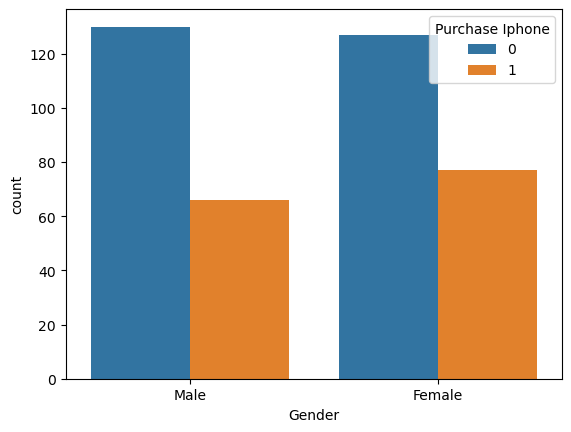

In [21]:
sns.countplot(x = 'Gender', hue = 'Purchase Iphone', data = df)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [29]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [31]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [35]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [37]:
df.corr()

,Gender,Age,Salary,Purchase Iphone
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
Salary,-0.060435,0.155238,1.000000,0.362083
Purchase Iphone,-0.042469,0.622454,0.362083,1.000000


<Axes: xlabel='Salary', ylabel='count'>

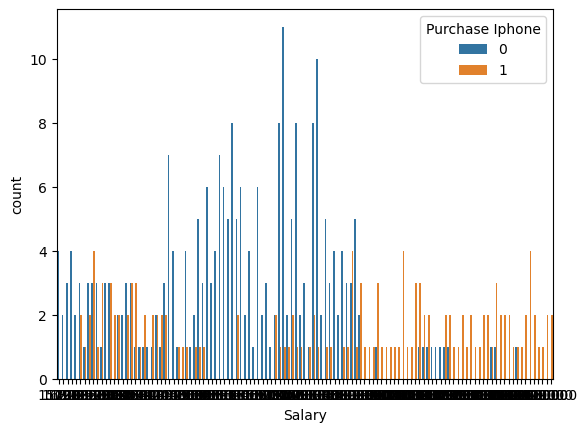

In [39]:
sns.countplot(x = 'Salary', hue = 'Purchase Iphone', data = df)

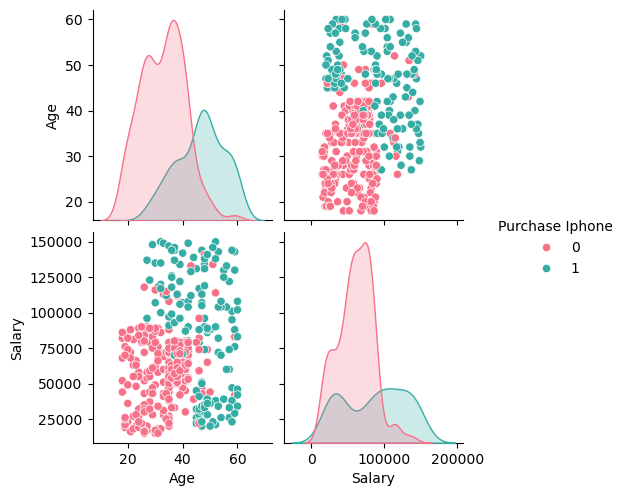

In [45]:
sns.pairplot(df, hue='Purchase Iphone', vars=['Age', 'Salary'], palette='husl')
plt.savefig("pair plot.png")
plt.show()

In [47]:
x = df.drop('Purchase Iphone', axis = 1)
y = df['Purchase Iphone']

In [49]:
from sklearn.model_selection import train_test_split

In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
kncl = KNeighborsClassifier()

In [63]:
kncl.fit(xtrain,ytrain)

KNeighborsClassifier()

In [65]:
kncl.score(xtest,ytest)

0.825

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
decl = DecisionTreeClassifier()

In [71]:
decl.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [73]:
decl.score(xtest,ytest)

0.8625

In [75]:
pred = kncl.predict(xtest)

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [81]:
result = accuracy_score(pred,ytest)

In [83]:
result

0.825

<Axes: >

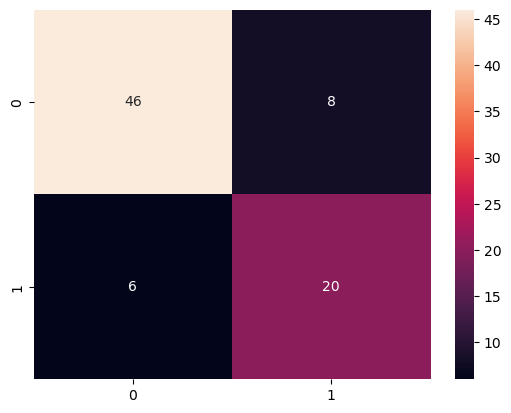

In [87]:
sns.heatmap(confusion_matrix(pred,ytest),annot = True)